In [2]:
#Тесты - Christoffersen’s 1998 Exceedence Independence Test 
#https://www.value-at-risk.net/backtesting-independence-tests/
import pandas as pd

pd.set_option('display.max_rows', 600)

def get_column(df, num1:int, num2:int) -> float:
    """
    :param num1:
    :param num2:
    :return:
    """
    df = df.tolist()
    a = []
    for i in range(1, len(df)):
        # print(df.iloc[i])
        if df[i-1] == num1 and df[i] == num2:
            a.append(1)
        else:
            a.append(0)

    return a


df = pd.read_excel(r'C:\Users\User\Desktop\events_alrs.xlsx',engine='openpyxl').events_data

a00 = pd.Series(get_column(df, 0, 0))
a01 = pd.Series(get_column(df, 0, 1))
a10 = pd.Series(get_column(df, 1, 0))
a11 = pd.Series(get_column(df, 1, 1))

sum_a00 = sum(a00)
print('sum_a00',sum_a00)
sum_a01 = sum(a01)
print('sum_a01',sum_a01)
sum_a10 = sum(a10)
print('sum_a10',sum_a10)
sum_a11 = sum(a11)
print('sum_a11',sum_a11)

q0 = sum_a00/(sum_a00+sum_a01)
q1 = sum_a10/(sum_a10+sum_a11)
q = (sum_a00+sum_a10)/(sum_a00+sum_a01+sum_a10+sum_a11)

res = pd.DataFrame(a00, columns=['a00'])
res['a01'] = a01
res['a10'] = a10
res['a11'] = a11

print(res)
print('========================')
print("q0 =", q0)
print("q1 =", q1)
print("q =", q)

sum_a00 480
sum_a01 20
sum_a10 20
sum_a11 0
     a00  a01  a10  a11
0      1    0    0    0
1      1    0    0    0
2      1    0    0    0
3      1    0    0    0
4      1    0    0    0
5      1    0    0    0
6      1    0    0    0
7      1    0    0    0
8      1    0    0    0
9      1    0    0    0
10     1    0    0    0
11     1    0    0    0
12     1    0    0    0
13     1    0    0    0
14     1    0    0    0
15     1    0    0    0
16     1    0    0    0
17     1    0    0    0
18     1    0    0    0
19     1    0    0    0
20     1    0    0    0
21     1    0    0    0
22     1    0    0    0
23     1    0    0    0
24     1    0    0    0
25     1    0    0    0
26     1    0    0    0
27     1    0    0    0
28     1    0    0    0
29     1    0    0    0
30     1    0    0    0
31     1    0    0    0
32     1    0    0    0
33     1    0    0    0
34     1    0    0    0
35     1    0    0    0
36     1    0    0    0
37     1    0    0    0
38     1    0    0  

In [3]:
print(res)
print('========================')
print("q0 =", q0)
print("q1 =", q1)
print("q =", q)

     a00  a01  a10  a11
0      1    0    0    0
1      1    0    0    0
2      1    0    0    0
3      1    0    0    0
4      1    0    0    0
5      1    0    0    0
6      1    0    0    0
7      1    0    0    0
8      1    0    0    0
9      1    0    0    0
10     1    0    0    0
11     1    0    0    0
12     1    0    0    0
13     1    0    0    0
14     1    0    0    0
15     1    0    0    0
16     1    0    0    0
17     1    0    0    0
18     1    0    0    0
19     1    0    0    0
20     1    0    0    0
21     1    0    0    0
22     1    0    0    0
23     1    0    0    0
24     1    0    0    0
25     1    0    0    0
26     1    0    0    0
27     1    0    0    0
28     1    0    0    0
29     1    0    0    0
30     1    0    0    0
31     1    0    0    0
32     1    0    0    0
33     1    0    0    0
34     1    0    0    0
35     1    0    0    0
36     1    0    0    0
37     1    0    0    0
38     1    0    0    0
39     1    0    0    0
40     1    0   

In [4]:
#Расчет Likelihood Ratio по частям
import math

LR1 = (q/q0)**sum_a00
LR2 = (1-q)/(1-q0)**sum_a01
LR3 = (q/q1)**sum_a10
LR4 = (1-q)/(1-q1)**sum_a11
LR = LR1*LR2*LR3*LR4
print('LR= ',LR)
#Расчет тестовой статистики. –2log (Λ) соответствует распределению хи-квадрат с одной степенью свободы, 
# то есть –2log (Λ) ~ χ2 (1,0)
a = -2*math.log(LR)
print('-2logLR=',float(a))
#Условие
if a>=3.841:
    print('Отвергаем H0 гипотезу на 5% уровне значимости')
else:
    print('Принимаем H0 гипотезу на 5% уровне значимости') 

LR=  1.3243170459708027e+25
-2logLR= -115.69104842880569
Принимаем H0 гипотезу на 5% уровне значимости


In [12]:
#Загрузим показатели PCA ДЛЯ ALRS
import pandas as pd
df1 = pd.read_excel(r'C:\Users\User\Desktop\alrs.xlsx',engine='openpyxl')
PCA = df1[['TIME','principal component 1']]
pca = PCA.rename(columns={'principal component 1': 'pca_ALRS'})
pca.head()

,TIME,pca_ALRS
0,2015-03-04 10:00:00,7.176269
1,2015-03-04 10:01:00,7.773778
2,2015-03-04 10:02:00,3.469468
3,2015-03-04 10:03:00,1.653437
4,2015-03-04 10:04:00,1.283072


In [13]:
#Загрузим показатели PCA ДЛЯ SBER
import pandas as pd
df2 = pd.read_excel(r'C:\Users\User\Desktop\PCA_SBER_20150303.xlsx',engine='openpyxl')
PCA2 = df2[['TIME','principal component 1']]
pca2 = PCA2.rename(columns={'principal component 1': 'pca_SBER'})
pca2.head()

,TIME,pca_SBER
0,2015-03-03 10:00:00,7.257660
1,2015-03-03 10:01:00,4.929446
2,2015-03-03 10:02:00,2.720467
3,2015-03-03 10:03:00,0.570513
4,2015-03-03 10:04:00,2.494441


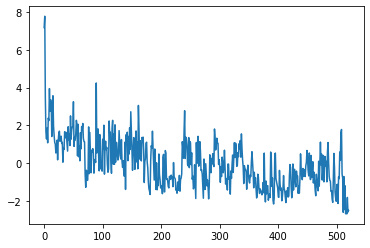

In [20]:
#Построение графика временного ряда для одной бумаги
from pandas import Series
import matplotlib.pyplot as plt

my_series = pca['pca_ALRS'].squeeze()
my_series.plot()
pyplot.show()

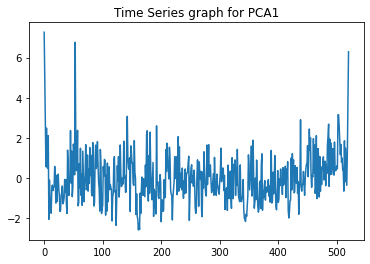

In [21]:
#Построение графика временного ряда для одной бумаги
from pandas import Series
import matplotlib.pyplot as plt

my_series1 = pca2['pca_SBER'].squeeze()
my_series1.plot()
plt.title('Time Series graph for PCA1')
pyplot.show()

In [23]:
#Проверка стационарности ряда - тест Дикки-Фуллера
from statsmodels.tsa.stattools import adfuller
import statsmodels as sm
test = adfuller(my_series)
print ('adf: ', test[0])
print ('p-value: ', test[1])
print ('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -3.2438647531164166
p-value:  0.017581935349276486
Critical values:  {'1%': -3.4432372923913124, '5%': -2.86722383510113, '10%': -2.5697972702806613}
единичных корней нет, ряд стационарен


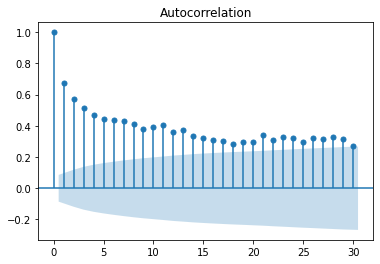

In [25]:
#Построение автокорреляционной функции. Показывает корреляцию y(t) и y(t-k) k периодов назад - https://www.statology.org/autocorrelation-python/
#Показывает автокорреляцию между текущим значением и любыми прошлыми значениями.
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(my_series,lags=30)
pyplot.show()
#Тест показывает наличие автокорреляции, что говорит о том, что есть вероятность увидеть последовательные шоки.

In [28]:
#Значение автокорреляции Пирсона на разных лагах
shift_1 = my_series.autocorr(lag=1)
print(shift_1)

0.694732401455814


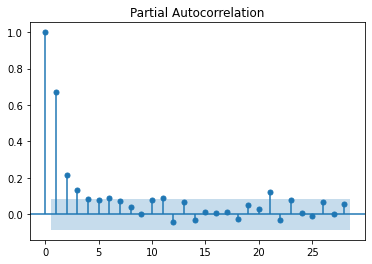

In [29]:
#Функция частной корреляции
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(my_series)
pyplot.show()

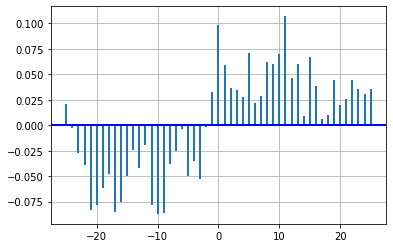

In [31]:
#График cross-correlation между 2 рядами - - https://www.geeksforgeeks.org/matplotlib-pyplot-xcorr-in-python/
# Используется функция взаимной корреляции, чтобы определить, существует ли связь между двумя временными рядами.
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.xcorr(pca['pca_ALRS'],pca2['pca_SBER'],maxlags=25,lw=2)
ax1.grid(True)
ax1.axhline(0, color='blue', lw=2)

In [32]:
#Функция, сдвигающая значения дейтафрейма на определенный лаг
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [34]:
data = pd.concat([pca['pca_ALRS'], pca2['pca_SBER']],axis = 1)
dt = pd.concat([pca[['TIME']],data], axis = 1)
dt

,TIME,pca_ALRS,pca_SBER
0,2015-03-04 10:00:00,7.176269,7.257660
1,2015-03-04 10:01:00,7.773778,4.929446
2,2015-03-04 10:02:00,3.469468,2.720467
3,2015-03-04 10:03:00,1.653437,0.570513
4,2015-03-04 10:04:00,1.283072,2.494441
5,2015-03-04 10:05:00,1.859548,0.568183
6,2015-03-04 10:06:00,1.079363,0.490933
7,2015-03-04 10:07:00,2.389698,2.114942
8,2015-03-04 10:08:00,2.252575,-2.044438
9,2015-03-04 10:09:00,3.946947,-0.092966


In [35]:
df_new_1 = df_shifted(dt, target = 'TIME', lag=-1)
df_new_1

,TIME,pca_ALRS,pca_SBER
0,2015-03-04 10:00:00,7.773778,4.929446
1,2015-03-04 10:01:00,3.469468,2.720467
2,2015-03-04 10:02:00,1.653437,0.570513
3,2015-03-04 10:03:00,1.283072,2.494441
4,2015-03-04 10:04:00,1.859548,0.568183
5,2015-03-04 10:05:00,1.079363,0.490933
6,2015-03-04 10:06:00,2.389698,2.114942
7,2015-03-04 10:07:00,2.252575,-2.044438
8,2015-03-04 10:08:00,3.946947,-0.092966
9,2015-03-04 10:09:00,2.743349,-0.990464


In [36]:
df_new_1.corr()

,pca_ALRS,pca_SBER
pca_ALRS,1.000000,0.038139
pca_SBER,0.038139,1.000000


In [37]:
#Временной ряд с 2 лагами
df_new_2 = df_shifted(dt,target = 'TIME', lag=-2)
df_new_2

,TIME,pca_ALRS,pca_SBER
0,2015-03-04 10:00:00,3.469468,2.720467
1,2015-03-04 10:01:00,1.653437,0.570513
2,2015-03-04 10:02:00,1.283072,2.494441
3,2015-03-04 10:03:00,1.859548,0.568183
4,2015-03-04 10:04:00,1.079363,0.490933
5,2015-03-04 10:05:00,2.389698,2.114942
6,2015-03-04 10:06:00,2.252575,-2.044438
7,2015-03-04 10:07:00,3.946947,-0.092966
8,2015-03-04 10:08:00,2.743349,-0.990464
9,2015-03-04 10:09:00,3.362686,-1.591653


In [38]:
#Временной ряд с 3 лагами
df_new_3= df_shifted(dt, target = 'TIME', lag=-3)
df_new_3

,TIME,pca_ALRS,pca_SBER
0,2015-03-04 10:00:00,1.653437,0.570513
1,2015-03-04 10:01:00,1.283072,2.494441
2,2015-03-04 10:02:00,1.859548,0.568183
3,2015-03-04 10:03:00,1.079363,0.490933
4,2015-03-04 10:04:00,2.389698,2.114942
5,2015-03-04 10:05:00,2.252575,-2.044438
6,2015-03-04 10:06:00,3.946947,-0.092966
7,2015-03-04 10:07:00,2.743349,-0.990464
8,2015-03-04 10:08:00,3.362686,-1.591653
9,2015-03-04 10:09:00,3.199814,-1.741620


In [39]:
A = pd.merge(df_new_3,df_new_2,on = 'TIME',how = 'left',suffixes=('_3lags','_2lags'))
B = pd.merge(A,df_new_1,on = 'TIME',how = 'left')
B.drop(columns=['TIME']).corr()

,pca_ALRS_3lags,pca_SBER_3lags,pca_ALRS_2lags,pca_SBER_2lags,pca_ALRS,pca_SBER
pca_ALRS_3lags,1.000000,-0.025264,0.669742,-0.034996,0.606771,0.006662
pca_SBER_3lags,-0.025264,1.000000,-0.040644,0.306478,-0.027676,0.233279
pca_ALRS_2lags,0.669742,-0.040644,1.000000,-0.011912,0.673689,-0.010327
pca_SBER_2lags,-0.034996,0.306478,-0.011912,1.000000,-0.010929,0.318865
pca_ALRS,0.606771,-0.027676,0.673689,-0.010929,1.000000,0.038139
pca_SBER,0.006662,0.233279,-0.010327,0.318865,0.038139,1.000000


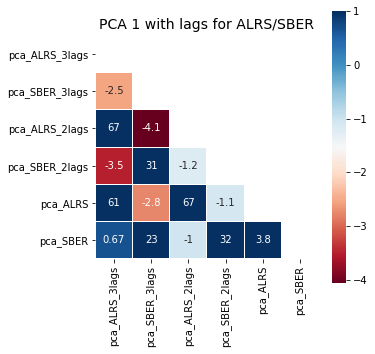

In [40]:
#Cross-correlations for two securities
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(5,5))
plt.title('PCA 1 with lags for ALRS/SBER', y=1.0, size=14)

mask = np.zeros_like(B.corr())
mask[np.triu_indices_from(mask)] = True

svm = sns.heatmap(B.corr()*100, mask=mask, linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white',annot = True)